In [1]:
# Bring your packages onto the path
import sys, os
# include directory 3 levels up 
# for 1 level up '..' 
# for 2 levels '../..'
sys.path.append(os.path.abspath(os.path.join('../../..')))

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

# custom modules
from Models.Chaboche_Model.ChabocheModel import ChabocheModel
from Models.Chaboche_Model.ChabocheModel import generate_model_evaluations 

In [3]:
t_min = 0
t_max = 2
delta_t = 1e-3 # time step
n_t = int((t_max-t_min)/delta_t)
T = np.linspace(t_min, t_max, n_t+1)

max_strain = 5e-2
time_to_max_strain = 1

model = ChabocheModel('1D', 'monotonic', max_strain, time_to_max_strain)

In [4]:
# Material properties
# YM: Young's Modulus [N/mm²]
# v: Poisson's ratio
# sigma_y: initial yield limit [N/mm²]
E, v, sigma_y = 2e5, 0.3, 250

## Isotropic hardening
# Q_iso: Isotropic asymptote [ 80 N/mm²] 
# n_iso: exponent [3]
# b_iso: growth rate [10]
# D_iso: limit [170 N/mm²]
Q_iso, n_iso, b_iso, D_iso = 50, 2, 100, 50

## Kinematic hardening
# Q_kin = Kinematic asymptote [N/mm²]
# b_kin: growth rate
Q_kin, b_kin = 0, 0

# Parameter n

In [5]:
# Material properties
n_iso_values = [1,2,3,4,5,6]

'''
Inputs:
        0: Young's Modulus
        1: initial yield limit
        2: Q_iso
        3: b_iso
        4: n_iso
        5: sigma_D
        6: Q_kin
        7: b_kin
'''

SampleSpace = np.array([ [E]*6, 
                         [sigma_y]*6, 
                         [Q_iso]*6, 
                         [b_iso]*6, 
                         n_iso_values, 
                         [D_iso]*6, 
                         [Q_kin]*6, 
                         [b_kin]*6 ])

In [6]:
func_evaluations = generate_model_evaluations(model, t_min, t_max, delta_t, 'implicit', SampleSpace.T, parallel_computation = True)

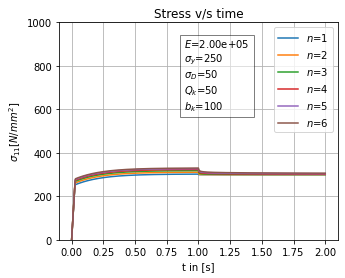

In [7]:
fig, ax = plt.subplots(figsize=(5,4))

for j, n_iso in enumerate(n_iso_values):
    ax.plot(T, func_evaluations[:, j], label = r'$n$=' + str(n_iso))

textstr = '\n'.join(( r'$E$=%.2e' % (E, ),
                      r'$\sigma_y$=%.f' % (sigma_y,),
                      r'$\sigma_D$=%.f' % (D_iso,),
                      r'$Q_k$=%.0f' % (Q_iso, ),
                      r'$b_k$=%.0f' % (b_iso, ) ))

# these are matplotlib.patch.Patch properties
props = dict(facecolor='white', alpha=0.5)

ax.text(0.45, 0.6, textstr, verticalalignment = 'baseline', transform=ax.transAxes, fontsize=10, bbox=props)

ax.set_title(r'Stress v/s time')
ax.set_xlabel('t in [s]')
ax.set_ylabel(r'$\sigma_{11} [N/mm^2]$')
ax.set_ylim(0,1000)
ax.grid()
ax.legend()

plt.savefig('Images/n.jpeg', bbox_inches = "tight", dpi = 300)

plt.show()

In [8]:
# Material properties
# YM: Young's Modulus [N/mm²]
# v: Poisson's ratio
# sigma_y: initial yield limit [N/mm²]
E, v, sigma_y = 2e5, 0.3, 250

## Isotropic hardening
# Q_iso: Isotropic asymptote [ 80 N/mm²] 
# n_iso: exponent [3]
# b_iso: growth rate [10]
# D_iso: limit [170 N/mm²]
Q_iso, n_iso, b_iso, D_iso = 50, 2, 100, 50

## Kinematic hardening
# Q_kin = Kinematic asymptote [N/mm²]
# b_kin: growth rate
Q_kin, b_kin = 0, 0

# Parameter $\sigma_D$

In [9]:
number_of_samples = 5
D_iso_values = list(np.linspace(1,100,number_of_samples))

'''
Inputs:
        0: Young's Modulus
        1: initial yield limit
        2: Q_iso
        3: b_iso
        4: n_iso
        5: sigma_D
        6: Q_kin
        7: b_kin
'''

SampleSpace = np.array([ [E]*number_of_samples, 
                         [sigma_y]*number_of_samples, 
                         [Q_iso]*number_of_samples, 
                         [b_iso]*number_of_samples, 
                         [n_iso]*number_of_samples, 
                         D_iso_values, 
                         [Q_kin]*number_of_samples, 
                         [b_kin]*number_of_samples ])

In [10]:
func_evaluations = generate_model_evaluations(model, t_min, t_max, delta_t, 'implicit', SampleSpace.T, parallel_computation = True)

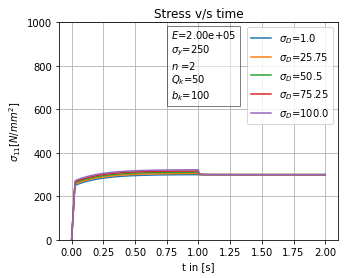

In [11]:
fig, ax = plt.subplots(figsize=(5,4))

# Plot curves for various parameters
for j, D_iso in enumerate(D_iso_values):
    ax.plot(T, func_evaluations[:, j], label = r'$\sigma_D$=' + str(D_iso))

textstr = '\n'.join(( r'$E$=%.2e' % (E, ),
                      r'$\sigma_y$=%.f' % (sigma_y,),
                      r'$n$ =%.f' % (n_iso,),
                      r'$Q_k$=%.0f' % (Q_iso, ),
                      r'$b_k$=%.0f' % (b_iso, ) ))

# these are matplotlib.patch.Patch properties
props = dict(facecolor='white', alpha=0.5)

ax.text(0.4, 0.65, textstr, verticalalignment = 'baseline', transform=ax.transAxes, fontsize=10, bbox=props)

ax.set_title(r'Stress v/s time')
ax.set_xlabel('t in [s]')
ax.set_ylabel(r'$\sigma_{11} [N/mm^2]$')
ax.set_ylim(0,1000)
ax.grid()
ax.legend()

plt.savefig('Images/D_iso.jpeg', bbox_inches = "tight", dpi = 300)

plt.show()

In [12]:
# Material properties
# YM: Young's Modulus [N/mm²]
# v: Poisson's ratio
# sigma_y: initial yield limit [N/mm²]
E, v, sigma_y = 2e5, 0.3, 250

## Isotropic hardening
# Q_iso: Isotropic asymptote [ 80 N/mm²] 
# n_iso: exponent [3]
# b_iso: growth rate [10]
# D_iso: limit [170 N/mm²]
Q_iso, n_iso, b_iso, D_iso = 50, 2, 100, 50

## Kinematic hardening
# Q_kin = Kinematic asymptote [N/mm²]
# b_kin: growth rate
Q_kin, b_kin = 0, 0

# Parameter $Q_{iso}$

In [13]:
number_of_samples = 5
Q_iso_values = list(np.linspace(0,500,number_of_samples))

'''
Inputs:
        0: Young's Modulus
        1: initial yield limit
        2: Q_iso
        3: b_iso
        4: n_iso
        5: sigma_D
        6: Q_kin
        7: b_kin
'''

SampleSpace = np.array([ [E]*number_of_samples, 
                         [sigma_y]*number_of_samples, 
                         Q_iso_values, 
                         [b_iso]*number_of_samples, 
                         [n_iso]*number_of_samples, 
                         [D_iso]*number_of_samples, 
                         [Q_kin]*number_of_samples, 
                         [b_kin]*number_of_samples ])



In [14]:
func_evaluations = generate_model_evaluations(model, t_min, t_max, delta_t, 'implicit', SampleSpace.T, parallel_computation = True)

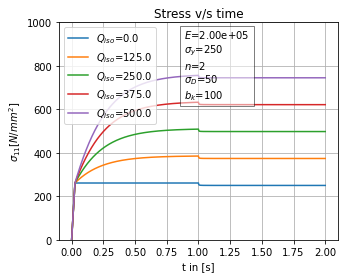

In [15]:
fig, ax = plt.subplots(figsize=(5,4))

# Plot curves for various parameters
for j, Q_iso in enumerate(Q_iso_values):
    ax.plot(T, func_evaluations[:, j], label = r'$Q_{iso}$=' + str(Q_iso))

textstr = '\n'.join(( r'$E$=%.2e' % (E, ),
                      r'$\sigma_y$=%.f' % (sigma_y,),
                      r'$n$=%.f' % (n_iso,),
                      r'$\sigma_D$=%.0f' % (D_iso, ),
                      r'$b_k$=%.0f' % (b_iso, ) ))

# these are matplotlib.patch.Patch properties
props = dict(facecolor='white', alpha=0.5)

ax.text(0.45, 0.65, textstr, verticalalignment = 'baseline', transform=ax.transAxes, fontsize=10, bbox=props)

ax.set_title(r'Stress v/s time')
ax.set_xlabel('t in [s]')
ax.set_ylabel(r'$\sigma_{11} [N/mm^2]$')
ax.set_ylim(0,1000)
ax.grid()
ax.legend()

plt.savefig('Images/Q_iso.jpeg', bbox_inches = "tight", dpi = 300)

plt.show()

In [16]:
# Material properties
# YM: Young's Modulus [N/mm²]
# v: Poisson's ratio
# sigma_y: initial yield limit [N/mm²]
E, v, sigma_y = 2e5, 0.3, 250

## Isotropic hardening
# Q_iso: Isotropic asymptote [ 80 N/mm²] 
# n_iso: exponent [3]
# b_iso: growth rate [10]
# D_iso: limit [170 N/mm²]
Q_iso, n_iso, b_iso, D_iso = 50, 2, 100, 50

## Kinematic hardening
# Q_kin = Kinematic asymptote [N/mm²]
# b_kin: growth rate
Q_kin, b_kin = 0, 0

# Parameter $\sigma_{y|0}$

In [17]:
number_of_samples = 5
sigma_y_values = list(np.linspace(200,400,number_of_samples))


'''
Inputs:
        0: Young's Modulus
        1: initial yield limit
        2: Q_iso
        3: b_iso
        4: n_iso
        5: sigma_D
        6: Q_kin
        7: b_kin
'''

SampleSpace = np.array([ [E]*number_of_samples, 
                         sigma_y_values, 
                         [Q_iso]*number_of_samples, 
                         [b_iso]*number_of_samples, 
                         [n_iso]*number_of_samples, 
                         [D_iso]*number_of_samples, 
                         [Q_kin]*number_of_samples, 
                         [b_kin]*number_of_samples ])

In [18]:
func_evaluations = generate_model_evaluations(model, t_min, t_max, delta_t, 'implicit', SampleSpace.T, parallel_computation = True)

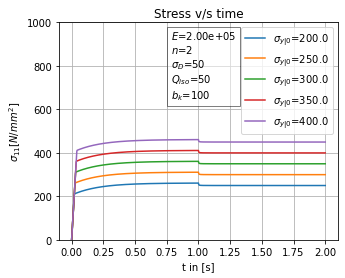

In [19]:
fig, ax = plt.subplots(figsize=(5,4))

# Plot curves for various parameters
for j, sigma_y in enumerate(sigma_y_values):
    ax.plot(T, func_evaluations[:, j], label = r'$\sigma_{y|0}$=' + str(sigma_y))

textstr = '\n'.join(( r'$E$=%.2e' % (E, ),
                      r'$n$=%.f' % (n_iso,),
                      r'$\sigma_D$=%.0f' % (D_iso, ),
                      r'$Q_{iso}$=%.f' % (Q_iso,),
                      r'$b_k$=%.0f' % (b_iso, ) ))

# these are matplotlib.patch.Patch properties
props = dict(facecolor='white', alpha=0.5)

ax.text(0.4, 0.65, textstr, verticalalignment = 'baseline', transform=ax.transAxes, fontsize=10, bbox=props)

ax.set_title(r'Stress v/s time')
ax.set_xlabel('t in [s]')
ax.set_ylabel(r'$\sigma_{11} [N/mm^2]$')
ax.set_ylim(0,1000)
ax.grid()
ax.legend()

plt.savefig('Images/sigma_y.jpeg', bbox_inches = "tight", dpi = 300)

plt.show()

In [20]:
# Material properties
# YM: Young's Modulus [N/mm²]
# v: Poisson's ratio
# sigma_y: initial yield limit [N/mm²]
E, v, sigma_y = 2e5, 0.3, 250

## Isotropic hardening
# Q_iso: Isotropic asymptote [ 80 N/mm²] 
# n_iso: exponent [3]
# b_iso: growth rate [10]
# D_iso: limit [170 N/mm²]
Q_iso, n_iso, b_iso, D_iso = 50, 2, 100, 50

## Kinematic hardening
# Q_kin = Kinematic asymptote [N/mm²]
# b_kin: growth rate
Q_kin, b_kin = 0, 0

# Parameter $b_{iso}$

In [21]:
number_of_samples = 5
b_iso_values = list(np.linspace(0,1000,number_of_samples))

'''
Inputs:
        0: Young's Modulus
        1: initial yield limit
        2: Q_iso
        3: b_iso
        4: n_iso
        5: sigma_D
        6: Q_kin
        7: b_kin
'''

SampleSpace = np.array([ [E]*number_of_samples, 
                         [sigma_y]*number_of_samples, 
                         [Q_iso]*number_of_samples, 
                         b_iso_values, 
                         [n_iso]*number_of_samples, 
                         [D_iso]*number_of_samples, 
                         [Q_kin]*number_of_samples, 
                         [b_kin]*number_of_samples ])

In [22]:
func_evaluations = generate_model_evaluations(model, t_min, t_max, delta_t, 'implicit', SampleSpace.T, parallel_computation = True)

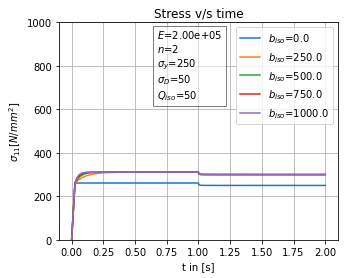

In [23]:
fig, ax = plt.subplots(figsize=(5,4))

# Plot curves for various parameters
for j, b_iso in enumerate(b_iso_values):
    ax.plot(T, func_evaluations[:, j], label = r'$b_{iso}$=' + str(b_iso))

textstr = '\n'.join(( r'$E$=%.2e' % (E, ),
                      r'$n$=%.f' % (n_iso,),
                      r'$\sigma_y$=%.0f' % (sigma_y, ),
                      r'$\sigma_D$=%.0f' % (D_iso, ),
                      r'$Q_{iso}$=%.f' % (Q_iso,) ))

# these are matplotlib.patch.Patch properties
props = dict(facecolor='white', alpha=0.5)

ax.text(0.35, 0.65, textstr, verticalalignment = 'baseline', transform=ax.transAxes, fontsize=10, bbox=props)

ax.set_title(r'Stress v/s time')
ax.set_xlabel('t in [s]')
ax.set_ylabel(r'$\sigma_{11} [N/mm^2]$')
ax.set_ylim(0,1000)
ax.grid()
ax.legend()

plt.savefig('Images/b_iso.jpeg', bbox_inches = "tight", dpi = 300)

plt.show()

In [24]:
# Material properties
# YM: Young's Modulus [N/mm²]
# v: Poisson's ratio
# sigma_y: initial yield limit [N/mm²]
E, v, sigma_y = 2e5, 0.3, 250

## Isotropic hardening
# Q_iso: Isotropic asymptote [ 80 N/mm²] 
# n_iso: exponent [3]
# b_iso: growth rate [10]
# D_iso: limit [170 N/mm²]
Q_iso, n_iso, b_iso, D_iso = 50, 2, 100, 50

## Kinematic hardening
# Q_kin = Kinematic asymptote [N/mm²]
# b_kin: growth rate
Q_kin, b_kin = 0, 0

# Parameter $E$

In [25]:
number_of_samples = 5
E_values = list(np.linspace(2e5,2.1e5,number_of_samples))

'''
Inputs:
        0: Young's Modulus
        1: initial yield limit
        2: Q_iso
        3: b_iso
        4: n_iso
        5: sigma_D
        6: Q_kin
        7: b_kin
'''

SampleSpace = np.array([ E_values, 
                         [sigma_y]*number_of_samples, 
                         [Q_iso]*number_of_samples, 
                         [b_iso]*number_of_samples, 
                         [n_iso]*number_of_samples, 
                         [D_iso]*number_of_samples, 
                         [Q_kin]*number_of_samples, 
                         [b_kin]*number_of_samples ])

In [26]:
func_evaluations = generate_model_evaluations(model, t_min, t_max, delta_t, 'implicit', SampleSpace.T, parallel_computation = True)

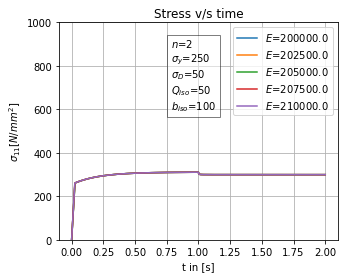

In [27]:
fig, ax = plt.subplots(figsize=(5,4))

# Plot curves for various parameters
for j, E in enumerate(E_values):
    ax.plot(T, func_evaluations[:, j], label = r'$E$=' + str(E))

textstr = '\n'.join(( r'$n$=%.f' % (n_iso,),
                      r'$\sigma_y$=%.0f' % (sigma_y, ),
                      r'$\sigma_D$=%.0f' % (D_iso, ),
                      r'$Q_{iso}$=%.f' % (Q_iso,),
                      r'$b_{iso}$=%.f' % (b_iso,) ))

# these are matplotlib.patch.Patch properties
props = dict(facecolor='white', alpha=0.5)

ax.text(0.4, 0.6, textstr, verticalalignment = 'baseline', transform=ax.transAxes, fontsize=10, bbox=props)

ax.set_title(r'Stress v/s time')
ax.set_xlabel('t in [s]')
ax.set_ylabel(r'$\sigma_{11} [N/mm^2]$')
ax.set_ylim(0,1000)
ax.grid()
ax.legend()

plt.savefig('Images/E.jpeg', bbox_inches = "tight", dpi = 300)


plt.show()

In [28]:
# Material properties
# YM: Young's Modulus [N/mm²]
# v: Poisson's ratio
# sigma_y: initial yield limit [N/mm²]
E, v, sigma_y = 2e5, 0.3, 250

## Isotropic hardening
# Q_iso: Isotropic asymptote [ 80 N/mm²] 
# n_iso: exponent [3]
# b_iso: growth rate [10]
# D_iso: limit [170 N/mm²]
Q_iso, n_iso, b_iso, D_iso = 50, 2, 100, 50

## Kinematic hardening
# Q_kin = Kinematic asymptote [N/mm²]
# b_kin: growth rate
Q_kin, b_kin = 0, 0

# Parameter $Q_{kin}$

In [29]:
# number_of_samples = 5
# Q_kin_values = list(np.linspace(0,500,number_of_samples))

# '''
# Inputs:
#         0: Young's Modulus
#         1: initial yield limit
#         2: Q_iso
#         3: b_iso
#         4: n_iso
#         5: sigma_D
#         6: Q_kin
#         7: b_kin
# '''

# SampleSpace = np.array([ [E]*number_of_samples, 
#                          [sigma_y]*number_of_samples, 
#                          [Q_iso]*number_of_samples, 
#                          [b_iso]*number_of_samples, 
#                          [n_iso]*number_of_samples, 
#                          [D_iso]*number_of_samples, 
#                          Q_kin_values, 
#                          [b_kin]*number_of_samples ])

In [30]:
# func_evaluations = generate_model_evaluations(model, t_min, t_max, delta_t, 'implicit', SampleSpace.T, savefile = False)

In [31]:
# fig, ax = plt.subplots(figsize=(5,4))

# # Plot curves for various parameters
# for j, Q_kin in enumerate(Q_kin_values):
#     ax.plot(T, func_evaluations.T[:, j], label = r'$Q_{x}$=' + str(Q_kin))

# textstr = '\n'.join(( r'$E$=%.2e' % (E, ),
#                       r'$n$=%.f' % (n_iso,),
#                       r'$\sigma_y$=%.0f' % (sigma_y, ),
#                       r'$\sigma_D$=%.0f' % (D_iso, ),
#                       r'$Q_{iso}$=%.f' % (Q_iso,),
#                       r'$b_{iso}$=%.f' % (b_iso,),
#                       r'$b_x$=%.0f' % (b_kin, ) ))

# # these are matplotlib.patch.Patch properties
# props = dict(facecolor='white', alpha=0.5)

# ax.text(0.4, 0.06, textstr, verticalalignment = 'baseline', transform=ax.transAxes, fontsize=10, bbox=props)

# ax.set_title(r'Stress v/s time')
# ax.set_xlabel('t in [s]')
# ax.set_ylabel(r'$\sigma_{11} [N/mm^2]$')
# ax.set_ylim(0,1400)
# ax.grid()
# ax.legend()

# plt.savefig('Q_kin.jpeg', bbox_inches = "tight", dpi = 300)

# plt.show()

# Parameter $b_{kin}$

In [32]:
# number_of_samples = 5
# b_kin_values = list(np.linspace(0,1000,number_of_samples))

# '''
# Inputs:
#         0: Young's Modulus
#         1: initial yield limit
#         2: Q_iso
#         3: b_iso
#         4: n_iso
#         5: sigma_D
#         6: Q_kin
#         7: b_kin
# '''

# SampleSpace = np.array([ [E]*number_of_samples, 
#                          [sigma_y]*number_of_samples, 
#                          [Q_iso]*number_of_samples, 
#                          [b_iso]*number_of_samples, 
#                          [n_iso]*number_of_samples, 
#                          [D_iso]*number_of_samples, 
#                          [Q_kin]*number_of_samples, 
#                          b_kin_values ])

In [33]:
# func_evaluations = generate_model_evaluations(model, t_min, t_max, delta_t, 'implicit', SampleSpace.T, savefile = False)

In [34]:
# fig, ax = plt.subplots(figsize=(5,4))

# # Plot curves for various parameters
# for j, b_kin in enumerate(b_kin_values):
#     ax.plot(T, func_evaluations.T[:, j], label = r'$b_{x}$=' + str(b_kin))

# textstr = '\n'.join(( r'$E$=%.2e' % (E, ),
#                       r'$n$=%.f' % (n_iso,),
#                       r'$\sigma_y$=%.0f' % (sigma_y, ),
#                       r'$\sigma_D$=%.0f' % (D_iso, ),
#                       r'$Q_{iso}$=%.f' % (Q_iso,),
#                       r'$b_{iso}$=%.f' % (b_iso,),
#                       r'$Q_{kin}$=%.f' % (Q_kin,), ))

# # these are matplotlib.patch.Patch properties
# props = dict(facecolor='white', alpha=0.5)

# ax.text(0.4, 0.06, textstr, verticalalignment = 'baseline', transform=ax.transAxes, fontsize=10, bbox=props)

# ax.set_title(r'Stress v/s time')
# ax.set_xlabel('t in [s]')
# ax.set_ylabel(r'$\sigma_{11} [N/mm^2]$')
# ax.set_ylim(0,1400)
# ax.grid()
# ax.legend()

# plt.savefig('b_kin.jpeg', bbox_inches = "tight", dpi = 300)

# plt.show()